In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split



## **0. Cargar los datos**

ID Cliente: identificacion del Cliente
Zona: Lugar donde se realizo la venta
Pais: donde se relizo la venta 
Tipo de producto: el producto que se vendio
Canal de venta: si se relaizo por medio online  o directamente en tienda
Prioridad: critica: producto tardo en ser despachado
alta: lo requiere con urgencia
Media: Es importante pero no tan urgente
baja: no lo requiere con urgencia
Fecha pedido: dia que realizo el pedido
ID Pedido: es el codigo asisgnado al pedido
Fecha envío: dia que se despacho el pedido
Unidades: unidades compradas
Precio Unitario: precio del producto al cliente
Coste unitario : precio del producto  al vendedor
Importe venta total: lo que le cuesta el total de unidades al cliente
Importe Coste total: lo  que le cuesta al vendedor


In [160]:
#
# (1) datos
#
pd.options.display.max_columns = None  # para mostrar todas las columnas
datos_ventas = pd.read_csv('registroventas.csv', sep=';')


In [161]:
#
datos_ventas.head() #vamos a ver un poco de lo contiene el dataset

,ID Cliente,Zona,País,Tipo de producto,Canal de venta,Prioridad,Fecha pedido,ID Pedido,Fecha envío,Unidades,Precio Unitario,Coste unitario,Importe venta total,Importe Coste total
0,C2421,Europa,United Kingdom,Snacks,Offline,Crítica,12/10/2020,242113196,30/11/2020,5530,"152,58 €","97,44 €","843.767,40 €","538.843,20 €"
1,C1908,Europa,Malta,Cárnicos,Online,Alta,26/01/2020,190800607,28/01/2020,994,"421,89 €","364,69 €","419.358,66 €","362.501,86 €"
2,C7652,Australia y Oceanía,Marshall Islands,Cereales,Online,Crítica,9/11/2020,765228068,21/11/2020,6845,"205,70 €","117,11 €","1.408.016,50 €","801.617,95 €"
3,C2326,África,Iran,Frutas,Offline,Baja,21/08/2021,232631909,2/10/2021,9806,"9,33 €","6,92 €","91.489,98 €","67.857,52 €"
4,C5305,Centroamérica y Caribe,Guatemala,Alimento infantil,Offline,Media,30/09/2022,530560958,12/11/2022,3633,"255,28 €","159,42 €","927.432,24 €","579.172,86 €"


In [162]:
# Obtener información sobre la base de datos con 1001 filas y 14 columnas, 
# y que casi las columnas son de tipo objeto. El método info() también muestra 
# que no hay valores nulos en ninguna de las columnas.
datos_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             1000 non-null   object
 1   Zona                   1000 non-null   object
 2   País                   1000 non-null   object
 3   Tipo de producto       1000 non-null   object
 4   Canal de venta         1000 non-null   object
 5   Prioridad              1000 non-null   object
 6   Fecha pedido           1000 non-null   object
 7   ID Pedido              1000 non-null   int64 
 8   Fecha envío            1000 non-null   object
 9   Unidades               1000 non-null   int64 
 10   Precio Unitario       1000 non-null   object
 11   Coste unitario        1000 non-null   object
 12   Importe venta total   1000 non-null   object
 13   Importe Coste total   1000 non-null   object
dtypes: int64(2), object(12)
memory usage: 109.5+ KB


In [163]:
datos_ventas.columns

Index(['ID Cliente', 'Zona', 'País', 'Tipo de producto', 'Canal de venta',
       'Prioridad', 'Fecha pedido', 'ID Pedido', 'Fecha envío', 'Unidades',
       ' Precio Unitario ', ' Coste unitario ', ' Importe venta total ',
       ' Importe Coste total '],
      dtype='object')

## **1.Curación de los datos**

In [164]:
# Crear un diccionario que mapea los nombres de las columnas antiguas a los nuevos nombres de las columnas

nombre_nuevas_columnas = {'ID Cliente' :'ID_Cliente', 'Zona':'Zona', 'País':'Pais', 'Tipo de producto':'Tipo_Producto', 'Canal de venta':'Canal_Venta',
       'Prioridad':'Prioridad', 'Fecha pedido':'Fecha_Pedido', 'ID Pedido':'ID_Pedido', 'Fecha envío':'Fecha_Envio', 'Unidades':'Unidades',
       ' Precio Unitario ': 'Precio_Unitario', ' Coste unitario ': 'Coste_Unitario', ' Importe venta total ':'Importe_Venta_Total',
       ' Importe Coste total ':'Importe_Coste_Total'}

# Renombrar las columnas usando el método rename()
datos_ventas = datos_ventas.rename(columns= nombre_nuevas_columnas)
datos_ventas

,ID_Cliente,Zona,Pais,Tipo_Producto,Canal_Venta,Prioridad,Fecha_Pedido,ID_Pedido,Fecha_Envio,Unidades,Precio_Unitario,Coste_Unitario,Importe_Venta_Total,Importe_Coste_Total
0,C2421,Europa,United Kingdom,Snacks,Offline,Crítica,12/10/2020,242113196,30/11/2020,5530,"152,58 €","97,44 €","843.767,40 €","538.843,20 €"
1,C1908,Europa,Malta,Cárnicos,Online,Alta,26/01/2020,190800607,28/01/2020,994,"421,89 €","364,69 €","419.358,66 €","362.501,86 €"
2,C7652,Australia y Oceanía,Marshall Islands,Cereales,Online,Crítica,9/11/2020,765228068,21/11/2020,6845,"205,70 €","117,11 €","1.408.016,50 €","801.617,95 €"
3,C2326,África,Iran,Frutas,Offline,Baja,21/08/2021,232631909,2/10/2021,9806,"9,33 €","6,92 €","91.489,98 €","67.857,52 €"
4,C5305,Centroamérica y Caribe,Guatemala,Alimento infantil,Offline,Media,30/09/2022,530560958,12/11/2022,3633,"255,28 €","159,42 €","927.432,24 €","579.172,86 €"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C1627,África,Malawi,Bebida,Online,Alta,4/08/2022,162745130,19/08/2022,8755,"47,45 €","31,79 €","415.424,75 €","278.321,45 €"
996,C4408,Asia,India,Cuidado personal,Offline,Crítica,17/04/2022,440898787,1/06/2022,604,"81,73 €","56,67 €","49.364,92 €","34.228,68 €"
997,C2808,Asia,Tajikistan,Frutas,Online,Media,29/04/2020,280876481,31/05/2020,6447,"9,33 €","6,92 €","60.150,51 €","44.613,24 €"
998,C8608,Europa,Finland,Verduras,Online,Baja,9/09/2020,860852038,15/09/2020,4103,"154,06 €","90,93 €","632.108,18 €","373.085,79 €"


Se identifico que hay 951 datos unicos en ID_Cliente y que hay mas de un pedido unico asociado a cada cliente

In [165]:
pedidos_por_cliente = datos_ventas.groupby('ID_Cliente')['ID_Pedido'].unique()
pedidos_por_cliente

ID_Cliente
C1008               [100884807]
C1061               [106102883]
C1062               [106213176]
C1069    [106946170, 106919562]
C1089               [108907830]
                  ...          
C9949               [994932448]
C9950               [995013129]
C9962               [996237075]
C9964               [996425902]
C9987               [998791825]
Name: ID_Pedido, Length: 951, dtype: object

In [166]:
#verificamos si hay datos duplicados o repetidos
datos_ventas.duplicated(subset=['ID_Cliente', 'ID_Pedido']).sum()

0

Esta línea de código elimina el símbolo euro de la columnas,
elimina los puntos decimales y cambia las comas por puntos decimales. 
Esto se hace para poder convertir la columna en un valor numérico (float) 
que se pueda utilizar luego en cálculos matemáticos.
 

In [167]:
#
datos_ventas['Precio_Unitario'] = datos_ventas['Precio_Unitario'].str.replace('€', '').str.replace('.', '').str.replace(',', '.')
datos_ventas['Coste_Unitario'] = datos_ventas['Coste_Unitario'].str.replace('€', '').str.replace('.', '').str.replace(',', '.')
datos_ventas['Importe_Venta_Total'] = datos_ventas['Importe_Venta_Total'].str.replace('€', '').str.replace('.', '').str.replace(',', '.')
datos_ventas['Importe_Coste_Total'] = datos_ventas['Importe_Coste_Total'].str.replace('€', '').str.replace('.', '').str.replace(',', '.')
datos_ventas

C:\Users\milen\AppData\Local\Temp\ipykernel_38464\1113390076.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos_ventas['Precio_Unitario'] = datos_ventas['Precio_Unitario'].str.replace('€', '').str.replace('.', '').str.replace(',', '.')
C:\Users\milen\AppData\Local\Temp\ipykernel_38464\1113390076.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos_ventas['Coste_Unitario'] = datos_ventas['Coste_Unitario'].str.replace('€', '').str.replace('.', '').str.replace(',', '.')
C:\Users\milen\AppData\Local\Temp\ipykernel_38464\1113390076.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular e

,ID_Cliente,Zona,Pais,Tipo_Producto,Canal_Venta,Prioridad,Fecha_Pedido,ID_Pedido,Fecha_Envio,Unidades,Precio_Unitario,Coste_Unitario,Importe_Venta_Total,Importe_Coste_Total
0,C2421,Europa,United Kingdom,Snacks,Offline,Crítica,12/10/2020,242113196,30/11/2020,5530,152.58,97.44,843767.40,538843.20
1,C1908,Europa,Malta,Cárnicos,Online,Alta,26/01/2020,190800607,28/01/2020,994,421.89,364.69,419358.66,362501.86
2,C7652,Australia y Oceanía,Marshall Islands,Cereales,Online,Crítica,9/11/2020,765228068,21/11/2020,6845,205.70,117.11,1408016.50,801617.95
3,C2326,África,Iran,Frutas,Offline,Baja,21/08/2021,232631909,2/10/2021,9806,9.33,6.92,91489.98,67857.52
4,C5305,Centroamérica y Caribe,Guatemala,Alimento infantil,Offline,Media,30/09/2022,530560958,12/11/2022,3633,255.28,159.42,927432.24,579172.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C1627,África,Malawi,Bebida,Online,Alta,4/08/2022,162745130,19/08/2022,8755,47.45,31.79,415424.75,278321.45
996,C4408,Asia,India,Cuidado personal,Offline,Crítica,17/04/2022,440898787,1/06/2022,604,81.73,56.67,49364.92,34228.68
997,C2808,Asia,Tajikistan,Frutas,Online,Media,29/04/2020,280876481,31/05/2020,6447,9.33,6.92,60150.51,44613.24
998,C8608,Europa,Finland,Verduras,Online,Baja,9/09/2020,860852038,15/09/2020,4103,154.06,90.93,632108.18,373085.79


In [168]:
#
datos_ventas['Precio_Unitario'] = datos_ventas['Precio_Unitario'].astype(float)
datos_ventas['Coste_Unitario'] = datos_ventas['Coste_Unitario'].astype(float)
datos_ventas['Importe_Venta_Total'] = datos_ventas['Importe_Venta_Total'].astype(float)
datos_ventas['Importe_Coste_Total'] = datos_ventas['Importe_Coste_Total'].astype(float)


In [169]:
# Convertimos las columnas 'FECHA_ACTUALIZACION', 'FECHA_INGRESO', 'FECHA_SINTOMAS' y 'FECHA_DEF' a tipo fecha
datos_ventas['Fecha_Pedido'] = pd.to_datetime(datos_ventas['Fecha_Pedido'], format='%d/%m/%Y')
datos_ventas['Fecha_Envio'] = pd.to_datetime(datos_ventas['Fecha_Envio'], format='%d/%m/%Y')

In [170]:
zona_map = {'Europa': 0, 'Australia y Oceanía': 1, 'África': 2, 'Centroamérica y Caribe': 3, 'Norteamérica': 4,'Asia': 5}
datos_ventas['zona'] = datos_ventas['Zona'].map(zona_map).astype(int)

CanalVenta_map = {'Offline': 0, 'Online': 1}
datos_ventas['canal_venta'] = datos_ventas['Canal_Venta'].map(CanalVenta_map).astype(int)

Prioridad_map = {'Crítica': 0, 'Alta': 1, 'Media': 2, 'Baja': 3}
datos_ventas['prioridad'] = datos_ventas['Prioridad'].map(Prioridad_map).astype(int)

Tipo_Producto_map = {'Snacks': 1, 'Cárnicos': 2, 'Cereales': 3, 'Frutas': 4, 'Alimento infantil': 5, 'Bebida': 6, 'Cosméticos': 7, 'Cuidado personal': 8, 'Material de oficina': 9, 'Verduras': 10, 'Ropa': 11, 'Doméstico': 12}
datos_ventas['tipo_producto'] = datos_ventas['Tipo_Producto'].map(Tipo_Producto_map).astype(int)

para cambiar las columnas tipo str a int creamos un dicionario con los datos que hay en la columna, luego aplicamos un mapeo y lo comvertivos a int usando el metodo map

In [171]:
datos_ventas.dtypes
#me muestra el cambio realizado anteriormente de object a float y de object a date para poder realizar el analisis 

ID_Cliente                     object
Zona                           object
Pais                           object
Tipo_Producto                  object
Canal_Venta                    object
Prioridad                      object
Fecha_Pedido           datetime64[ns]
ID_Pedido                       int64
Fecha_Envio            datetime64[ns]
Unidades                        int64
Precio_Unitario               float64
Coste_Unitario                float64
Importe_Venta_Total           float64
Importe_Coste_Total           float64
zona                            int32
canal_venta                     int32
prioridad                       int32
tipo_producto                   int32
dtype: object

In [172]:
datos_ventas.describe()

,ID_Pedido,Unidades,Precio_Unitario,Coste_Unitario,Importe_Venta_Total,Importe_Coste_Total,zona,canal_venta,prioridad,tipo_producto
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.436465e+08,5024.481000,260.837200,184.077810,1.289102e+06,9.070765e+05,2.063000,0.479000,1.516000,6.425000
std,2.608658e+08,2818.856568,216.124374,175.040935,1.411287e+06,1.102814e+06,1.647345,0.499809,1.127393,3.480588
min,1.008848e+08,1.000000,9.330000,6.920000,4.745000e+01,3.179000e+01,0.000000,0.000000,0.000000,1.000000
25%,3.106750e+08,2666.500000,81.730000,35.840000,3.007910e+05,1.705794e+05,1.000000,0.000000,1.000000,3.000000
50%,5.417702e+08,5125.500000,154.060000,97.440000,7.444941e+05,4.592834e+05,2.000000,0.000000,2.000000,6.000000
75%,7.784109e+08,7473.750000,421.890000,263.330000,1.773422e+06,1.173904e+06,3.000000,1.000000,3.000000,9.250000
max,9.987918e+08,9989.000000,668.270000,524.960000,6.618546e+06,5.068489e+06,5.000000,1.000000,3.000000,12.000000


## **2.Análisis de las ventas (EDA)**

In [173]:
#
# (0) Creacion de la principal variable dependiente de interés (ganancias)
#
datos_ventas['Ganancia']=datos_ventas['Importe_Venta_Total']-datos_ventas['Importe_Coste_Total']


In [174]:
datos_ventas.head()

,ID_Cliente,Zona,Pais,Tipo_Producto,Canal_Venta,Prioridad,Fecha_Pedido,ID_Pedido,Fecha_Envio,Unidades,Precio_Unitario,Coste_Unitario,Importe_Venta_Total,Importe_Coste_Total,zona,canal_venta,prioridad,tipo_producto,Ganancia
0,C2421,Europa,United Kingdom,Snacks,Offline,Crítica,2020-10-12,242113196,2020-11-30,5530,152.58,97.44,843767.40,538843.20,0,0,0,1,304924.20
1,C1908,Europa,Malta,Cárnicos,Online,Alta,2020-01-26,190800607,2020-01-28,994,421.89,364.69,419358.66,362501.86,0,1,1,2,56856.80
2,C7652,Australia y Oceanía,Marshall Islands,Cereales,Online,Crítica,2020-11-09,765228068,2020-11-21,6845,205.70,117.11,1408016.50,801617.95,1,1,0,3,606398.55
3,C2326,África,Iran,Frutas,Offline,Baja,2021-08-21,232631909,2021-10-02,9806,9.33,6.92,91489.98,67857.52,2,0,3,4,23632.46
4,C5305,Centroamérica y Caribe,Guatemala,Alimento infantil,Offline,Media,2022-09-30,530560958,2022-11-12,3633,255.28,159.42,927432.24,579172.86,3,0,2,5,348259.38


<Axes: >

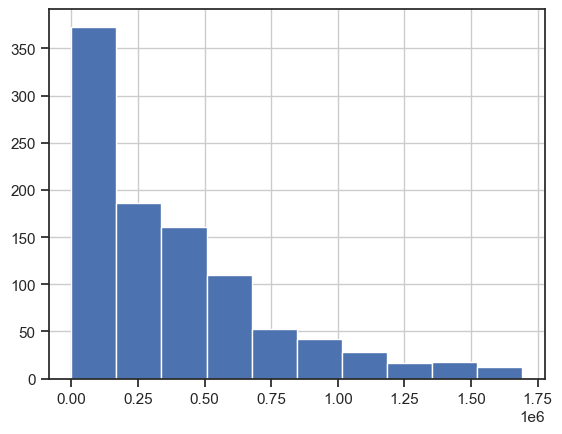

In [175]:
datos_ventas['Ganancia'].hist()

In [176]:
datos_ventas['Ganancia'].describe()

count    1.000000e+03
mean     3.820254e+05
std      3.658664e+05
min      1.566000e+01
25%      1.036730e+05
50%      2.643863e+05
75%      5.395533e+05
max      1.691755e+06
Name: Ganancia, dtype: float64

In [177]:
#
# Las ganancias por ventas de la plataforma varían en un rango entre 15 y 1 millon 691 euros
# por lo tanto en todas las ventas se ha ganado plata
# pero quisieramos saber en cuales tipos de ventas se ha ganado mas plata.
#

#
# (2) analisis de las variables independientes 
#


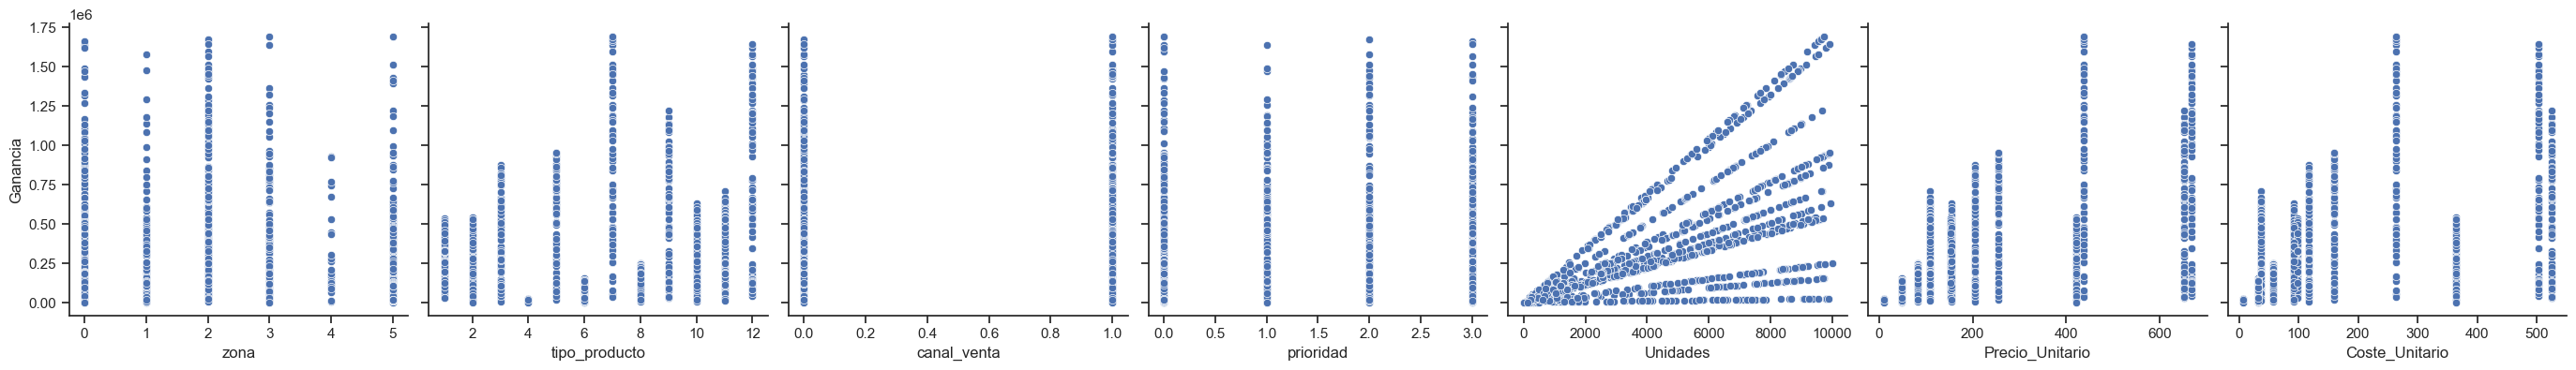

In [178]:
sns.set(style="ticks")
sns.pairplot(datos_ventas, x_vars=["zona","tipo_producto","canal_venta", "prioridad","Unidades", "Precio_Unitario","Coste_Unitario"], y_vars=['Ganancia'], height=4)


In [179]:
#
# (1) sectores de alto valor agregado (mucha rentabilidad): Cosmeticos, y los domesticos, alimento infantil 
# (2) sectores de muy bajo valor agregado (baja rentabilidad): Frutas, Bebidas, y Cuidado personal
# 

In [180]:
# hipotesis sobre incidencia del canal de venta
#
#ambos cananles de venta realizan ventas por igual  
# 

C:\Users\milen\AppData\Local\Temp\ipykernel_38464\550162101.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datos_ventas_sin_id.corr(), annot=True, linewidths=0.6, annot_kws={"size": 8})


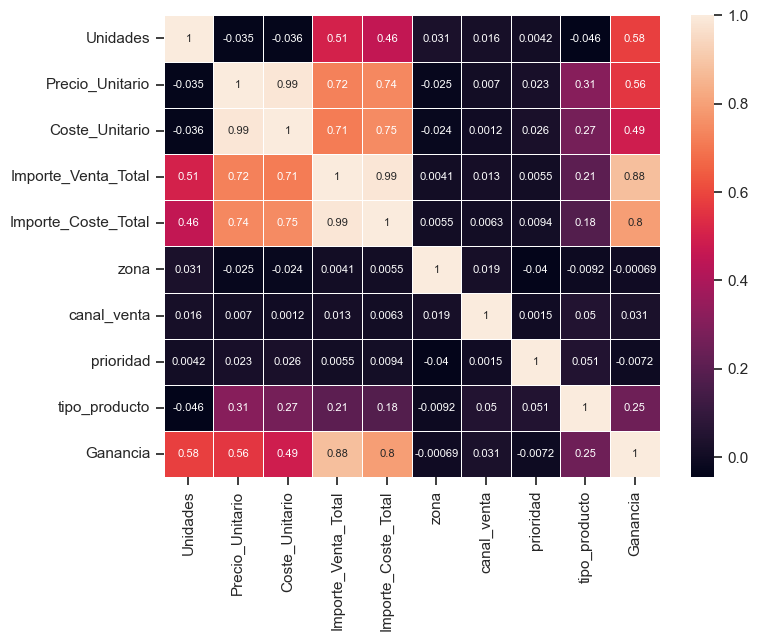

In [181]:

# Eliminar la columna "ID_Pedido"
datos_ventas_sin_id = datos_ventas.drop("ID_Pedido", axis=1)

# Crear el mapa de calor con un tamaño más pequeño
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(datos_ventas_sin_id.corr(), annot=True, linewidths=0.6, annot_kws={"size": 8})

# Mostrar el mapa de calor
plt.show()

CUAL FUE EL MES Y EL AÑO CON MAYOR VENTAS

In [182]:
# Agrupar los datos por mes y año
dv_anio_mes = datos_ventas.groupby([datos_ventas['Fecha_Pedido'].dt.year.rename('Año'), datos_ventas['Fecha_Pedido'].dt.month.rename('Mes')]).sum(numeric_only=True)

# Resetear el índice
dv_anio_mes = dv_anio_mes.reset_index()



C:\Users\milen\AppData\Local\Temp\ipykernel_38464\3144571994.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dv_anio_mes['Año'].astype(str) + '/' + dv_anio_mes['Mes'].astype(str), rotation=90)


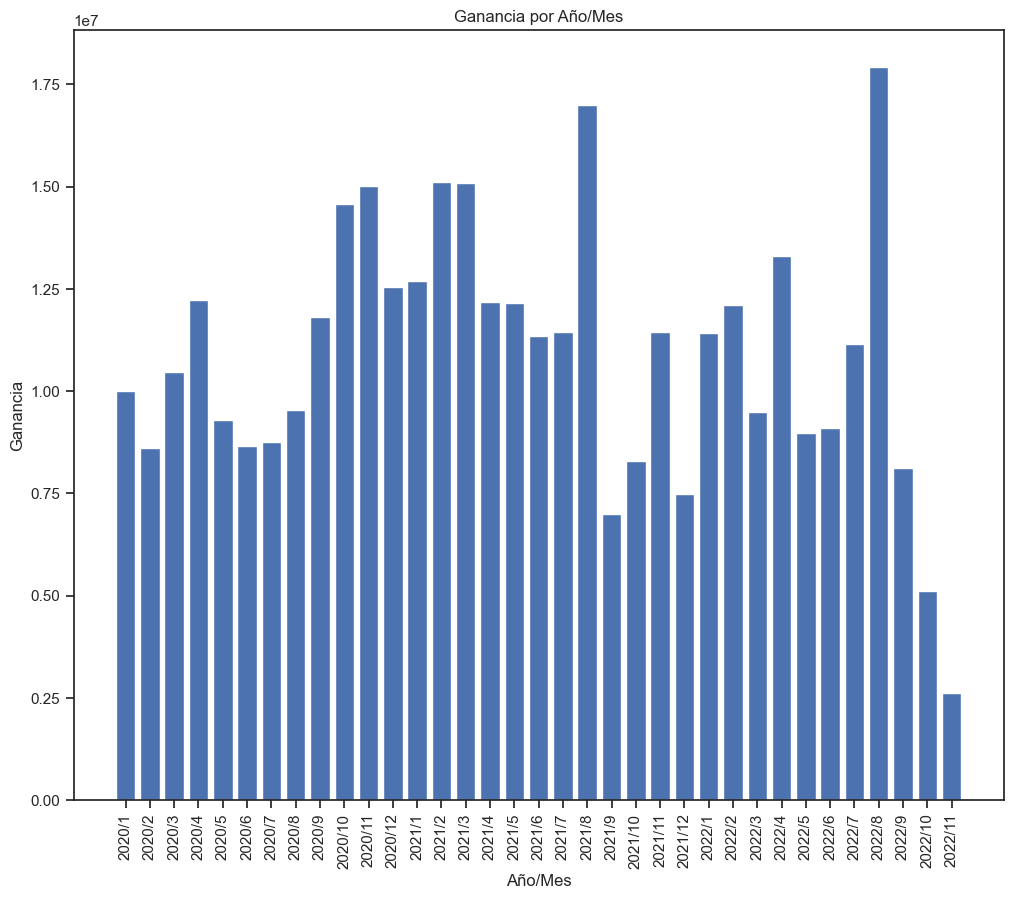

In [183]:

# Crear la figura y los ejes del subplot
fig, ax1 = plt.subplots(figsize=(12, 10))

# Trazar las barras de ganancia por año/mes
ax1.bar(dv_anio_mes['Año'].astype(str) + '/' + dv_anio_mes['Mes'].astype(str), dv_anio_mes['Ganancia'])
ax1.set_xticklabels(dv_anio_mes['Año'].astype(str) + '/' + dv_anio_mes['Mes'].astype(str), rotation=90)
ax1.set_xlabel('Año/Mes')
ax1.set_ylabel('Ganancia')
ax1.set_title('Ganancia por Año/Mes')

# Mostrar el gráfico
plt.show()

In [184]:
ganancia_anual = dv_anio_mes.groupby('Año')['Ganancia'].sum()
ganancia_anual

Año
2020    1.315148e+08
2021    1.412200e+08
2022    1.092906e+08
Name: Ganancia, dtype: float64

indica que el año donde mas ganacia se obtuvo es en el 2021 con una total de 141 mil euros y el año que menos ganacias se octubieron fue en el 2022 reduciendo significativamente las ganacias, queremos analizar el por que bajaron esas ganancias en el 2022 

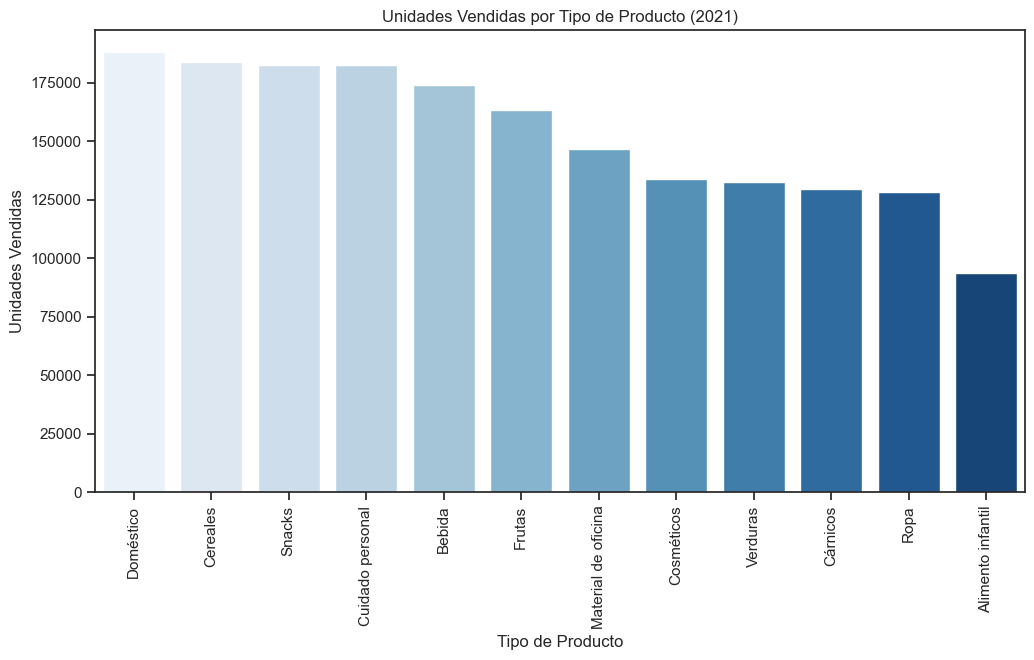

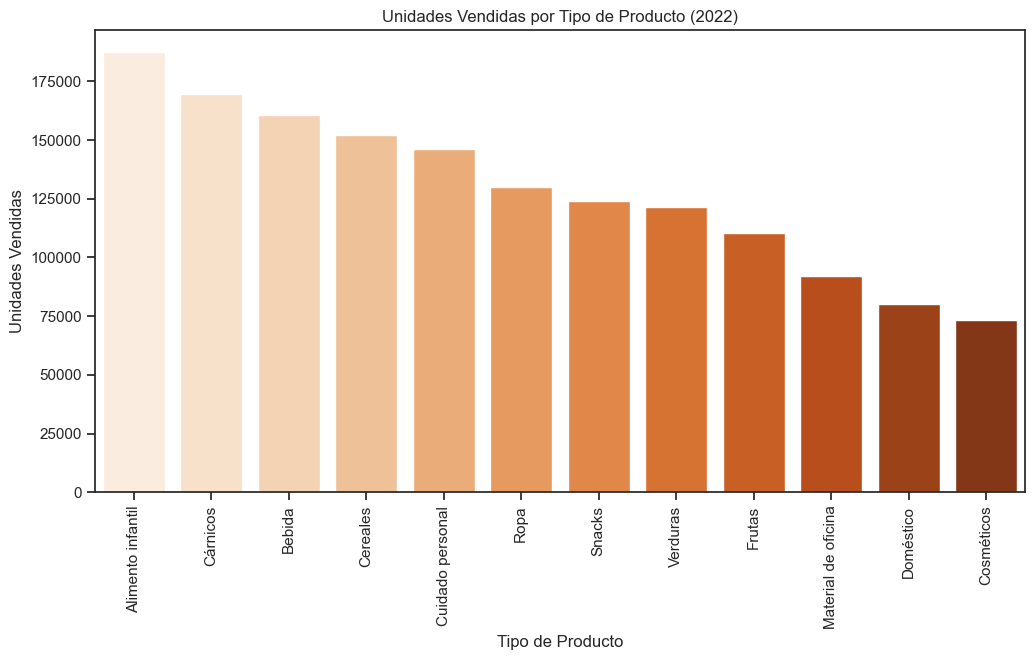

In [185]:
# Filtrar los datos por los años 2021 y 2022
datos_2021 = datos_ventas[datos_ventas['Fecha_Pedido'].dt.year == 2021]
datos_2022 = datos_ventas[datos_ventas['Fecha_Pedido'].dt.year == 2022]

# Agrupar los datos por tipo de producto y calcular la suma de las unidades vendidas para cada año
ventas_2021 = datos_2021.groupby('Tipo_Producto')['Unidades'].sum().reset_index()
ventas_2022 = datos_2022.groupby('Tipo_Producto')['Unidades'].sum().reset_index()

# Ordenar los datos por la suma de unidades vendidas de forma descendente
ventas_2021 = ventas_2021.sort_values('Unidades', ascending=False)
ventas_2022 = ventas_2022.sort_values('Unidades', ascending=False)

# Crear la figura y los ejes del primer gráfico (Año 2021)
fig, ax = plt.subplots(figsize=(12, 6))

# Trazar las barras de unidades vendidas por tipo de producto para el año 2021
sns.barplot(data=ventas_2021, x='Tipo_Producto', y='Unidades', palette='Blues', ax=ax)

# Establecer título y etiquetas de los ejes para el año 2021
ax.set_title('Unidades Vendidas por Tipo de Producto (2021)')
ax.set_xlabel('Tipo de Producto')
ax.set_ylabel('Unidades Vendidas')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el primer gráfico
plt.show()

# Crear la figura y los ejes del segundo gráfico (Año 2022)
fig, ax = plt.subplots(figsize=(12, 6))

# Trazar las barras de unidades vendidas por tipo de producto para el año 2022
sns.barplot(data=ventas_2022, x='Tipo_Producto', y='Unidades', palette='Oranges', ax=ax)

# Establecer título y etiquetas de los ejes para el año 2022
ax.set_title('Unidades Vendidas por Tipo de Producto (2022)')
ax.set_xlabel('Tipo de Producto')
ax.set_ylabel('Unidades Vendidas')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el segundo gráfico
plt.show()

CUAL ES LA ZONA CON MAYOR GANANCIA EN VENTAS


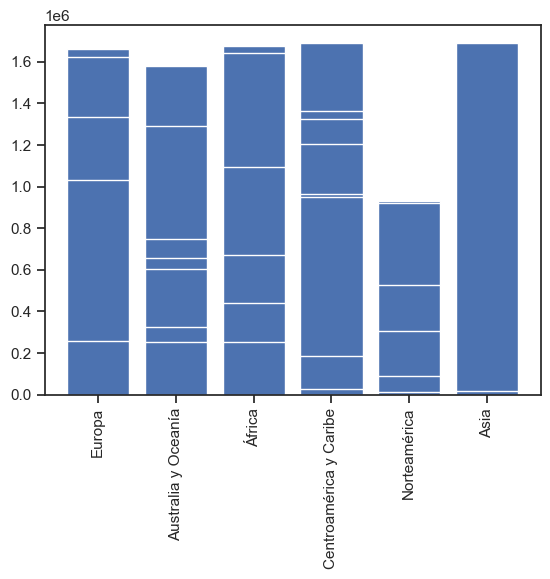

In [186]:
bars = plt.bar(datos_ventas['Zona'], datos_ventas['Ganancia'])
plt.xticks(rotation=90)
plt.show()

CUALES SON LOS PRODUCTOS QUE MAS MAS GANANCIA DEJAN


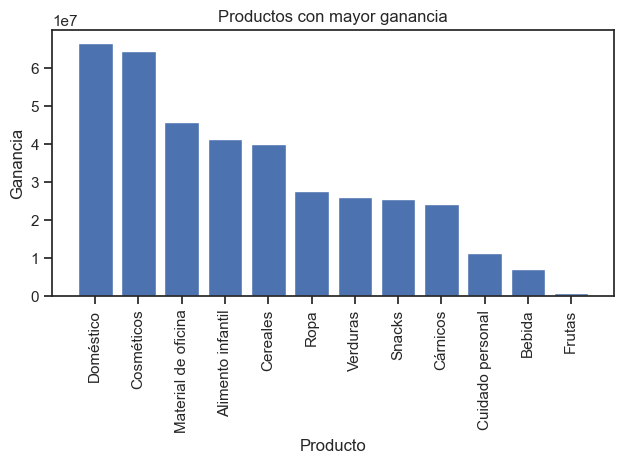

In [187]:
# Calcular la suma de ganancias por producto
ganancias_por_producto = datos_ventas.groupby('Tipo_Producto')['Ganancia'].sum()

# Ordenar los productos por ganancia de forma descendente
productos_mas_rentables = ganancias_por_producto.sort_values(ascending=False)

# Crear un gráfico de barras para los productos más rentables
plt.bar(productos_mas_rentables.index, productos_mas_rentables.values)
plt.xticks(rotation=90)
plt.title('Productos con mayor ganancia')
plt.xlabel('Producto')
plt.ylabel('Ganancia')
plt.tight_layout()
plt.show()

In [188]:
ganancias_por_producto = datos_ventas.groupby('Tipo_Producto')['Ganancia'].sum()

# Ordenar los productos por ganancia de forma descendente
productos_mas_rentables = ganancias_por_producto.sort_values(ascending=False)

# Mostrar los productos con mayor ganancia
print(productos_mas_rentables.head())

Tipo_Producto
Doméstico              66660914.98
Cosméticos             64511333.84
Material de oficina    45996031.25
Alimento infantil      41386500.54
Cereales               40225618.35
Name: Ganancia, dtype: float64


## **3. Modelos Estadístico**

In [189]:
#
# identificar las variables independientes y dependiente 
#
var_indepen=["zona","tipo_producto","canal_venta", "prioridad","Unidades", "Precio_Unitario","Coste_Unitario"]
var_depen = ["Ganancia"]
#


In [190]:
# Seleccionar las variables predictoras y la variable de respuesta
X = datos_ventas[var_indepen]
y = datos_ventas[var_depen]

# Agregar una constante a la matriz de características
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X)
results = model.fit()

# Imprimir los resultados del modelo
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               Ganancia   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     720.3
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        14:37:17   Log-Likelihood:                -13326.
No. Observations:                1000   AIC:                         2.667e+04
Df Residuals:                     992   BIC:                         2.671e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.773e+05   1.66e+04    -

El modelo con todas las variables introducidas como predictores tiene un  R2
alto (0.83), es capaz de explicar el 83% de la variabilidad observada en las ventas. 
El p-value del modelo es 0, lo cual significa que la probabilidad de obtener un resultado igual o más extremo que el observado debido al azar es extremadamente baja. Esto sugiere que el modelo es altamente significativo y que las variables predictoras tienen un efecto significativo en la variable de respuesta. 

En cuanto a las otras variables predictoras, sus p-values son mayores que 0.05. 
Esto sugiere que no se puede afirmar con confianza que estas variables tienen 
un efecto significativo en la variable de respuesta en este modelo. 

In [191]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión lineal múltiple utilizando solo los datos de entrenamiento
model = sm.OLS(y_train, X_train)
results = model.fit()

# Imprimir los resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Ganancia   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     476.3
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.00e-259
Time:                        14:37:17   Log-Likelihood:                -9322.9
No. Observations:                 700   AIC:                         1.866e+04
Df Residuals:                     692   BIC:                         1.870e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.556e+05   1.97e+04    -

C:\Users\milen\AppData\Local\Temp\ipykernel_38464\47709433.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Valor Real")
C:\Users\milen\AppData\Local\Temp\ipykernel_38464\47709433.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_

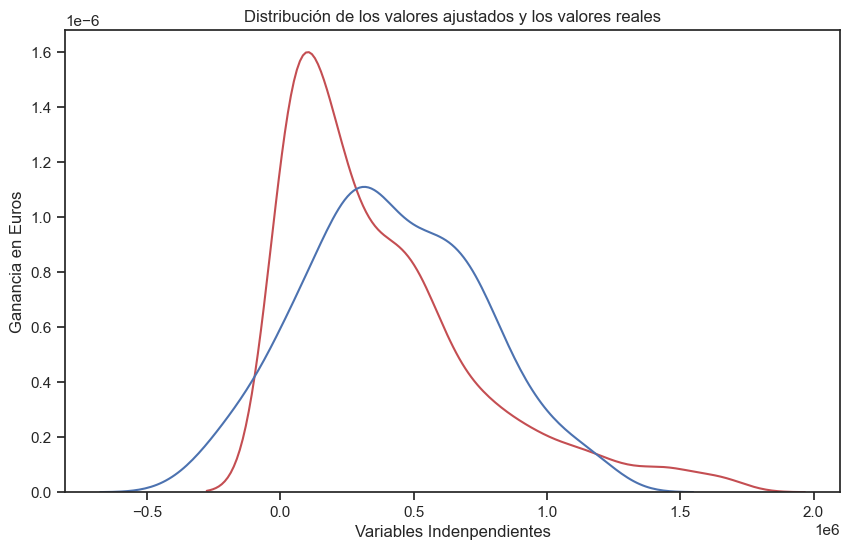

In [192]:
# Crear un modelo de regresión lineal y ajustarlo con los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores de ganancia con los datos de prueba
y_pred = model.predict(X_test)

# Obtener las predicciones para todo el conjunto de datos
Y_hat = model.predict(X)

# Graficar la distribución de los valores ajustados y los valores reales
width = 10
height = 6
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y, hist=False, color="r", label="Valor Real")
sns.distplot(y_pred, hist=False, color="b", label="Valor Ajustado", ax=ax1)

plt.title('Distribución de los valores ajustados y los valores reales')
plt.xlabel('Variables Indenpendientes')
plt.ylabel('Ganancia en Euros')

plt.show()
plt.close()

In [193]:
# Eliminar la columna 'canal_venta' del conjunto de entrenamiento y prueba
X_train = X_train.drop(columns=['canal_venta', 'prioridad', 'tipo_producto', 'zona'])
X_test = X_test.drop(columns=['canal_venta', 'prioridad', 'tipo_producto', 'zona'])

# Agregar una columna de 1s a la matriz de predictores para el intercepto del modelo
X_train = sm.add_constant(X_train, prepend=True)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()

# Imprimir los resultados del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               Ganancia   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1110.
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.01e-264
Time:                        14:37:18   Log-Likelihood:                -9324.9
No. Observations:                 700   AIC:                         1.866e+04
Df Residuals:                     696   BIC:                         1.868e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.743e+05   1.41e+04    -